In [467]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Définir le chemin où se trouve nos fichiers CSV
path = "./transactions-ser"

#Trouver tous les fichiers csv se trouvant dans notre chemin path
all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=';')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
#Concatener tout les dataframes dans notre liste all_df et les stocker dans un seul dataframe
data = pd.concat(all_df, ignore_index=True)
merged_df = data.copy()
merged_df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0023,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0053,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW,transactions-ser\76575_000BW.csv
2968,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,2,Appartement,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2969,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2970,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0094,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW,transactions-ser\76575_000BW.csv


In [468]:
# Récupèrer que les lignes qui contient appartement et maison
df = merged_df[(merged_df.type_local == 'Maison') | (merged_df.type_local == 'Appartement')]

# 1. Exploratory Data Analysis

## Objectif :

###         Comprendre du mieux possible nos données 

<AxesSubplot:ylabel='None'>

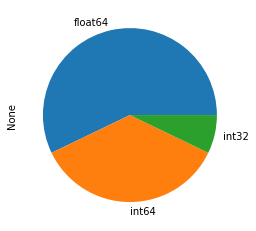

In [469]:
#Afin de voir les types de variables se trouvant dans notre dataframe
df1.dtypes.value_counts().plot.pie()

In [470]:
#On commence par éliminer les colonnes qui contient une seul et même valeur pour chaque ligne
to_drop = [column for column in df.columns if df[column].nunique() == 1]

df1 = df.drop(columns=to_drop)

In [471]:
#On remplace les strings 'None' par np.nan dans tout notre dataframe
df1=df1.replace(to_replace='None', value=np.nan)

<AxesSubplot:>

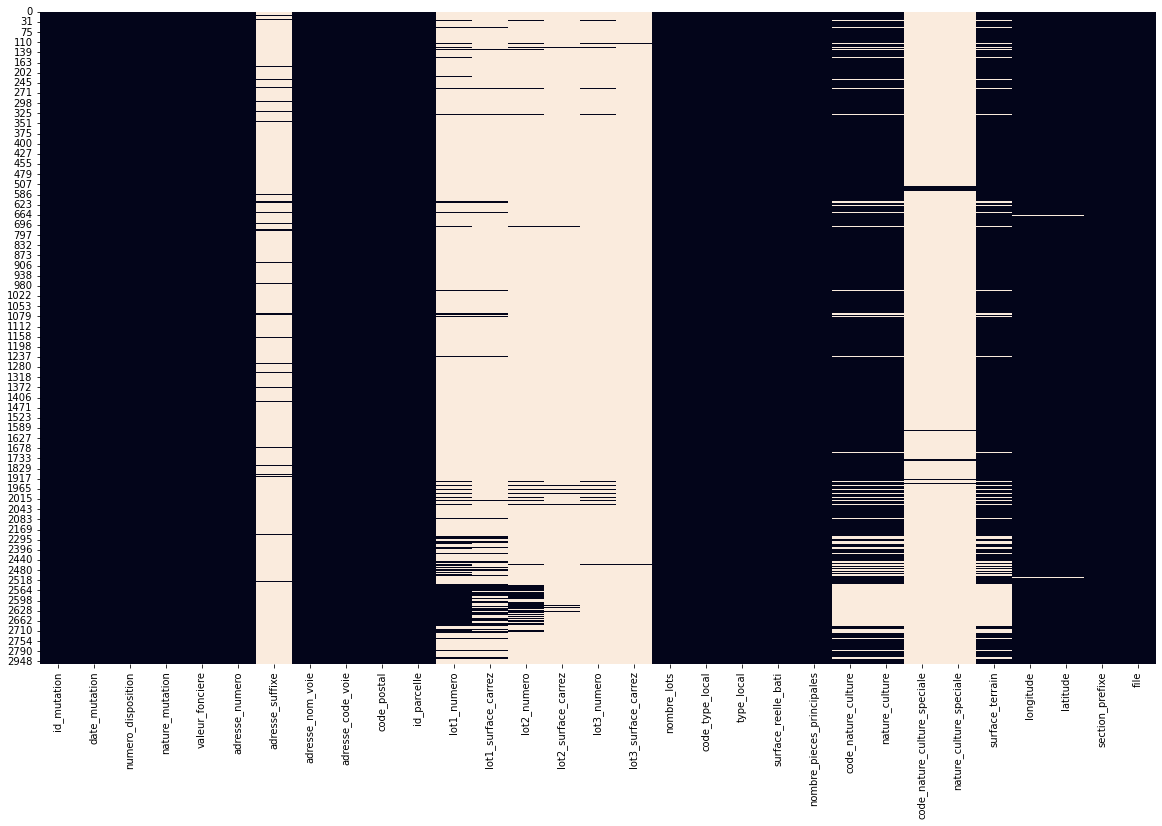

In [472]:
plt.figure(figsize=(20,12))
sns.heatmap(df1.isna(), cbar=False)

### Conclusion : On peut remarquer que dans la figure ci-dessus, que il y'a beaucoup de colonnes dans notre dataframe qui ont des données manquantes, la couleur noir signifie que il y a des valeurs, pour l'autre couleur c'est pour nous montrer que se sont des NaN

In [473]:
#Ici on calcule le taux des données manquantes pour chaque colonne (valeur NaN)
missing_rate = df1.isna().sum()/df1.shape[0]
missing_rate

id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
adresse_numero                  0.000677
adresse_suffixe                 0.959405
adresse_nom_voie                0.000000
adresse_code_voie               0.000000
code_postal                     0.000000
id_parcelle                     0.000000
lot1_numero                     0.842355
lot1_surface_carrez             0.905277
lot2_numero                     0.918809
lot2_surface_carrez             0.981732
lot3_numero                     0.973613
lot3_surface_carrez             0.996617
nombre_lots                     0.000000
code_type_local                 0.000000
type_local                      0.000000
surface_reelle_bati             0.000000
nombre_pieces_principales       0.000000
code_nature_culture             0.158322
nature_culture                  0.158322
code_nature_cult

In [474]:
#Supprimer les colonnes ayant un messing_rate > 0.8
df1.drop(columns=['adresse_suffixe','lot1_numero', 'lot1_surface_carrez', 'lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','code_nature_culture_speciale','nature_culture_speciale'], inplace=True)
#Supprimer les colonnes ayant d'autres colonnes les représentant avec des valeur (int, ....)
df1.drop(columns = ['adresse_nom_voie','nature_culture','file','id_mutation','code_postal','type_local','id_parcelle','adresse_code_voie'], inplace=True)
df1 = df1.dropna() #We can drop all the rows that have NaN, we don't lose a lot of data

In [475]:
#Pour voir le nombre de valeurs nous restant dans notre dataframe
df1.shape

(1238, 14)

### Histogrammes de nos variables:

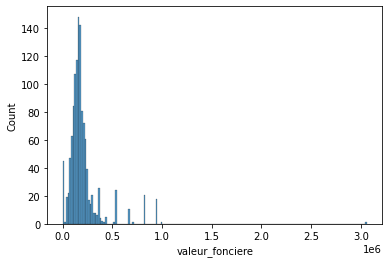

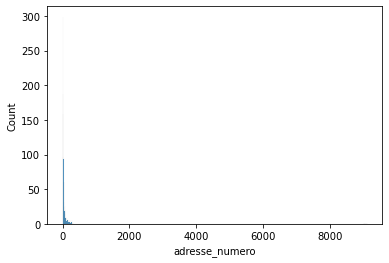

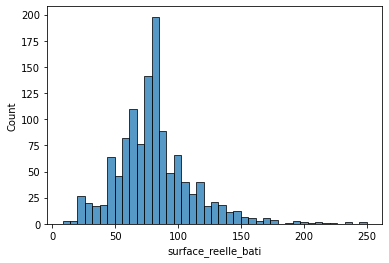

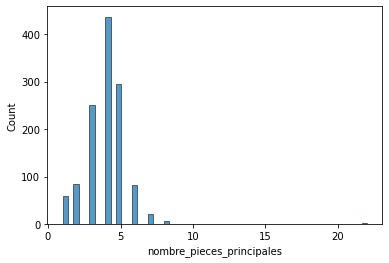

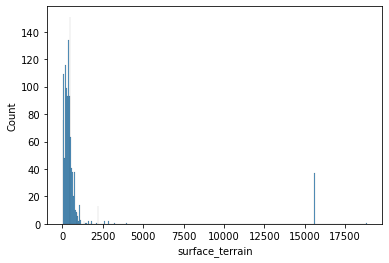

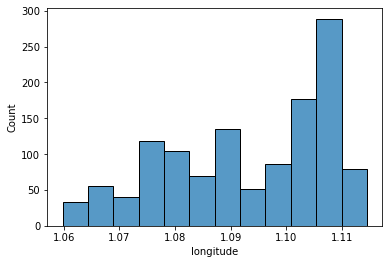

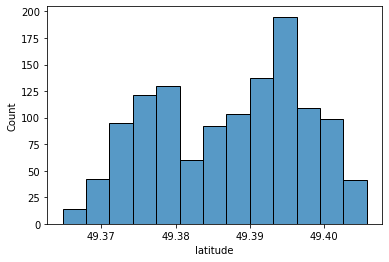

In [476]:
for col in df1.select_dtypes('float'):
    plt.figure()
    sns.histplot(df1[col])

#### On peut remarquer grâce a nos histogramme que il y a 1 entrée dans notre target qui est très élevé comparé aux  autres, ainsi que dans la surface terrain 2 valeurs très distinguées des autres

In [477]:
sorted(df1.surface_terrain.unique(), reverse=True)[:5]


[18847.0, 15640.0, 3973.0, 3221.0, 2847.0]

In [478]:
sorted(df1.valeur_fonciere.unique(), reverse=True)[:5]

[3060533.2, 1000000.0, 950000.0, 830000.0, 820000.0]

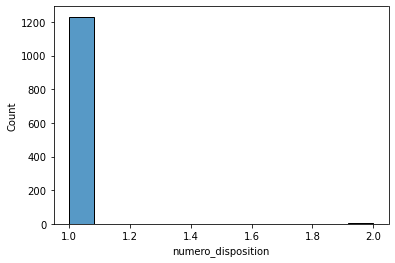

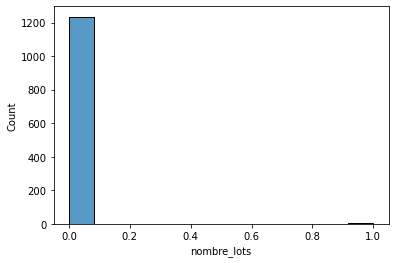

In [479]:
for col in df1.select_dtypes('int'):
    plt.figure()
    sns.histplot(df1[col])

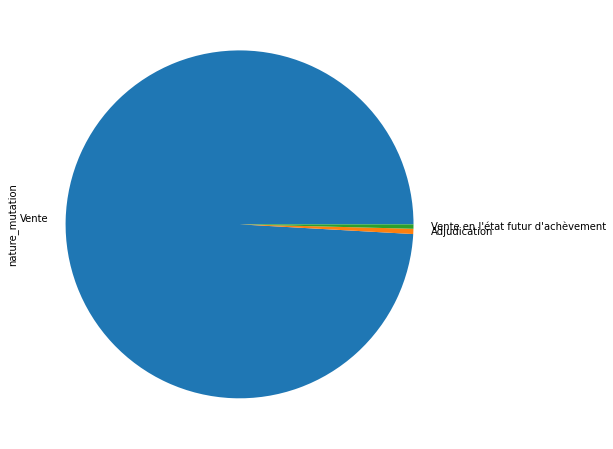

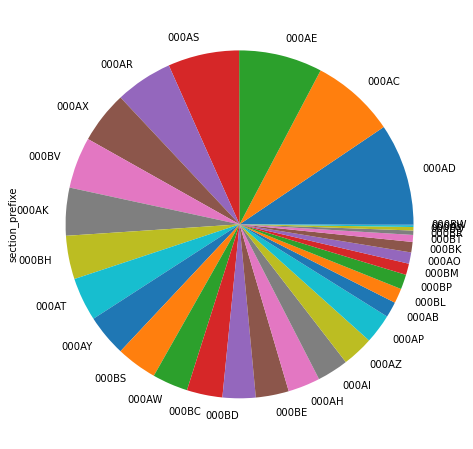

In [480]:
col = ['nature_mutation','section_prefixe']
for i in col:
    plt.figure(figsize=(15,8))
    df1[i].value_counts().plot.pie()

### Relation Variables / Variables

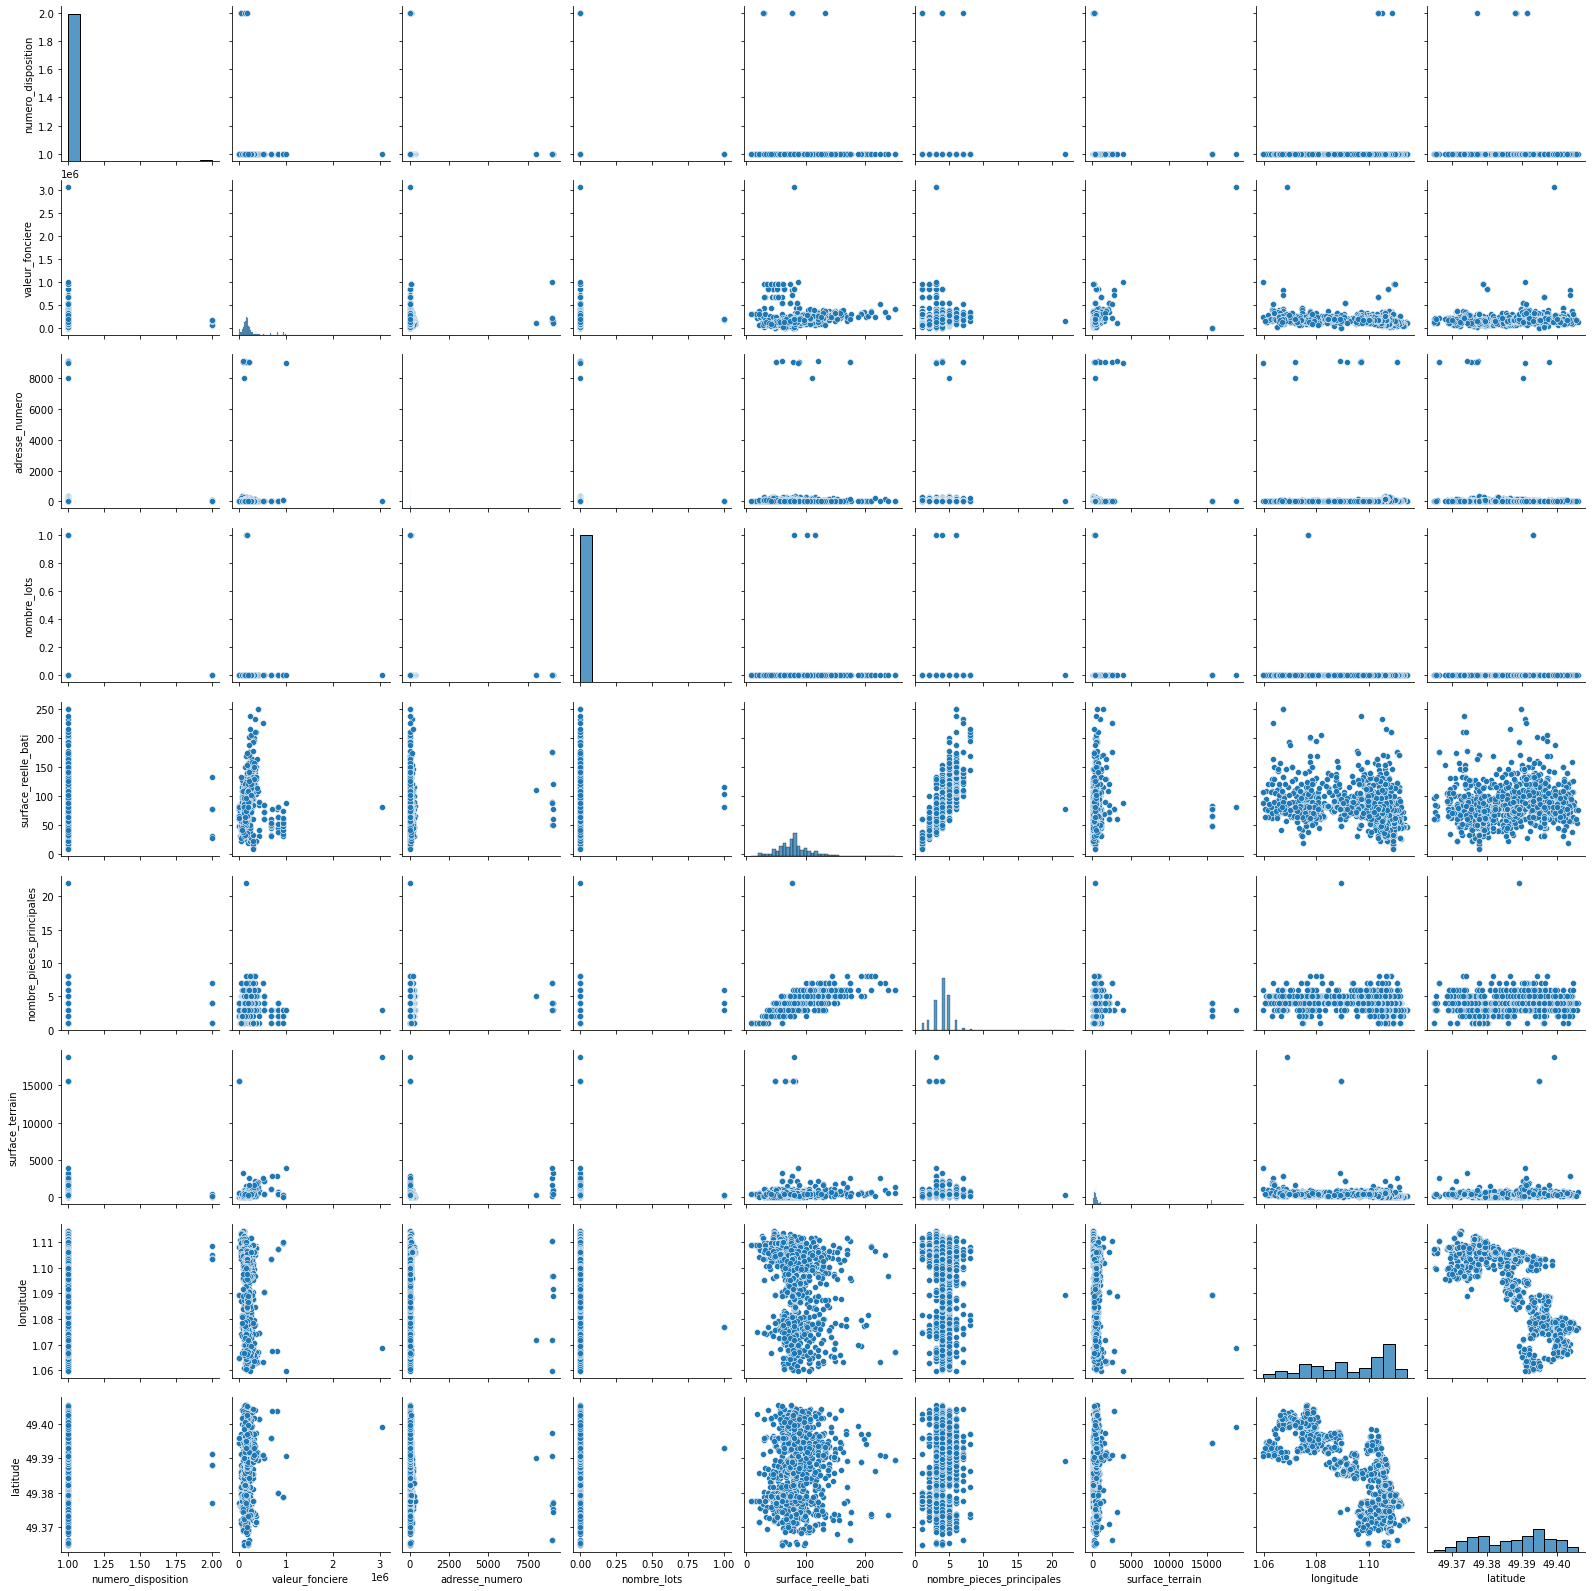

In [481]:
sns.pairplot(df1)

<Figure size 1440x864 with 0 Axes>

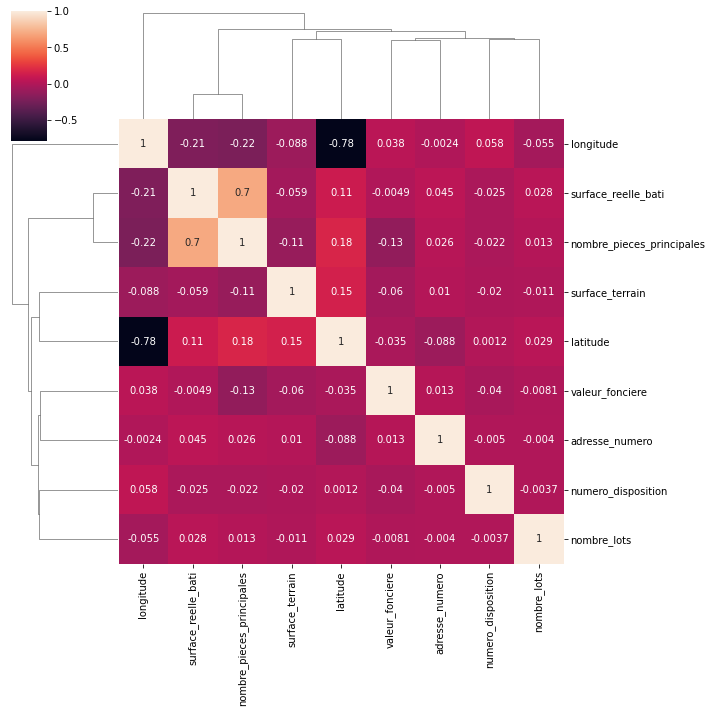

In [482]:
#Afin de visualiser la corrélation entre les features et notre target 'valeur_fonciere'
plt.figure(figsize=(20,12))
sns.clustermap(df1.corr(), annot=True)

### Encodage des variables qualitatifs

In [483]:
#transformation de la date en année
df1['annee_mutation'] = df1['date_mutation'].apply(lambda x: x.split('-')[0])
df1['annee_mutation']= df1['annee_mutation'].astype(int)
df1 = df1.drop(['date_mutation'], axis=1)

In [484]:
code = {'Vente': 0,
        'Adjudication': 1,
        'Vente en l\'état futur d\'achèvement': 2,
        'S':0,
        'AG':1,
        'J':2,
        'L':3,
        'AB':4,
        '1':1,
        '2':2,
        '000AB': 0, '000AC': 1, '000AD': 2, '000AE': 3, '000AH': 4, '000AI': 5, '000AK': 6, '000AO': 7, '000AP': 8,
        '000AR': 9, '000AS': 10, '000AT': 11, '000AV': 12, '000AW': 13, '000AX': 14, '000AY': 15, '000AZ': 16, '000BC': 17,
        '000BD': 18, '000BE': 19, '000BH': 20, '000BK': 21, '000BL': 22, '000BM': 23, '000BO': 24, '000BP': 25, '000BR': 26,
        '000BS': 27, '000BT': 28, '000BV': 29, '000BW': 30
       }

for col in df1.select_dtypes('object'):
    df1[col] = df1[col].map(code)

array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'nature_mutation'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'code_type_local'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>],
       [<AxesSubplot:title={'center':'code_nature_culture'}>,
        <AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'section_prefixe'}>,
        <AxesSubplot:title={'center':'annee_mutation'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

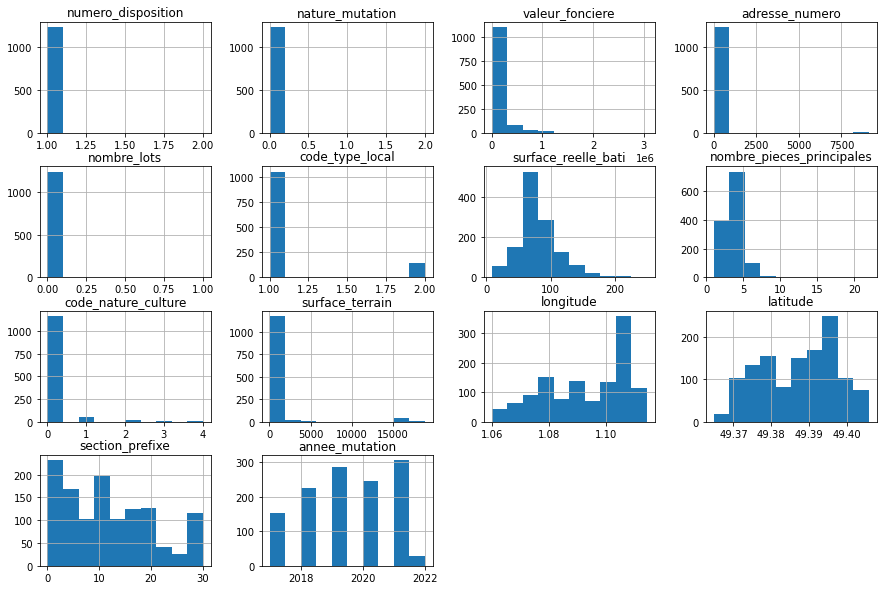

In [485]:
#print(df1['section_prefixe'].unique())
df1.hist(figsize=(15,10))

<Figure size 720x576 with 0 Axes>

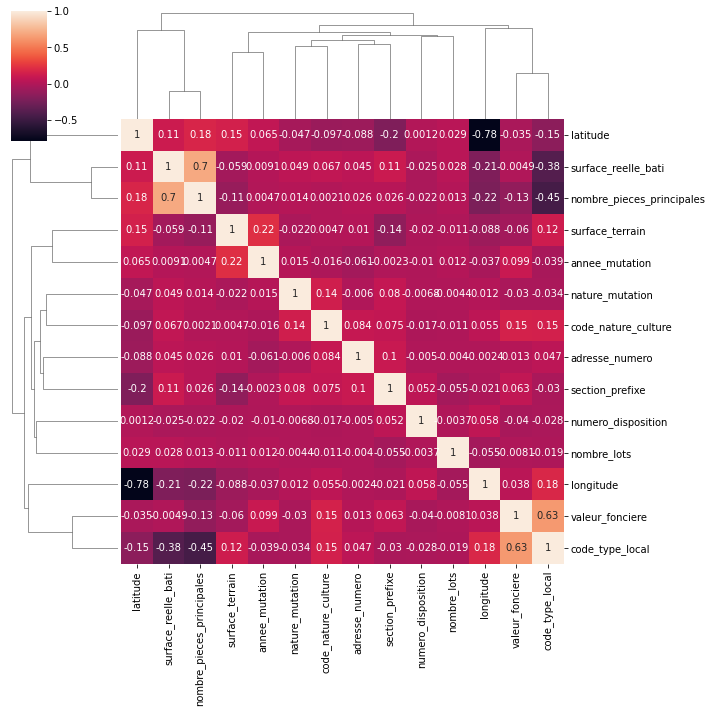

In [486]:
plt.figure(figsize=(10,8))
sns.clustermap(df1.corr(), annot=True)


# Conclusion: On remarque qu'il n' y a pas de corrélation entre la target et les features, cela risque d'impacter fortement notre modèle de prédiction.


### On va donc travailler avec deux DataFrames, un pour maison et l'autre pour appartement

In [487]:
df_mai = df1[df1['code_type_local'] == 1] # dataFrame pour Maison
df_app = df1[df1['code_type_local'] == 2] # DataFrame pour Appartement



In [488]:
df_mai = df_mai.drop(['code_type_local'], axis=1)
df_app = df_app.drop(['code_type_local'], axis=1)

<AxesSubplot:>

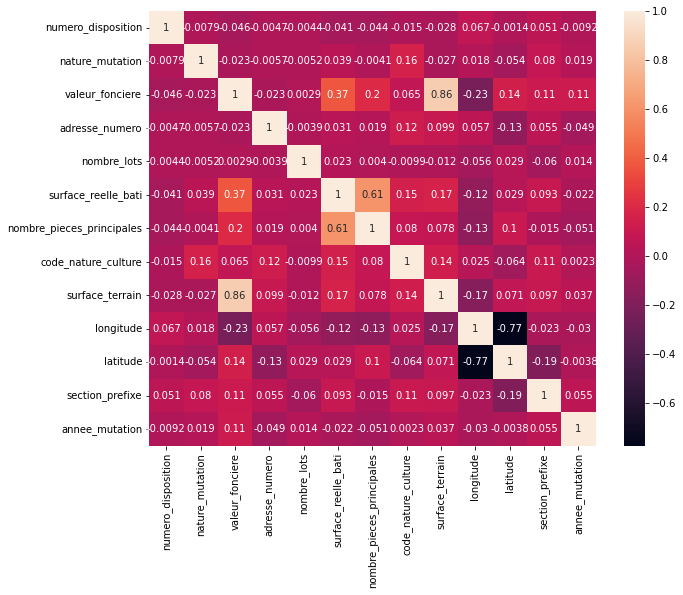

In [489]:
#Visualiser la corrélation entre les features et la target
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_mai.corr(), annot=True, ax=ax)


###  On remarque que maintenant on a une meilleure corrélation entre les features et notre target notamment  surface_terrain qui est très corrélé à valeur fonciere

In [490]:
#Suppression des colonnes ayant une très faible correlation
df_mai = df_mai.drop(columns=['numero_disposition','nature_mutation','adresse_numero','nombre_lots','code_nature_culture'], axis=1)

<Figure size 720x576 with 0 Axes>

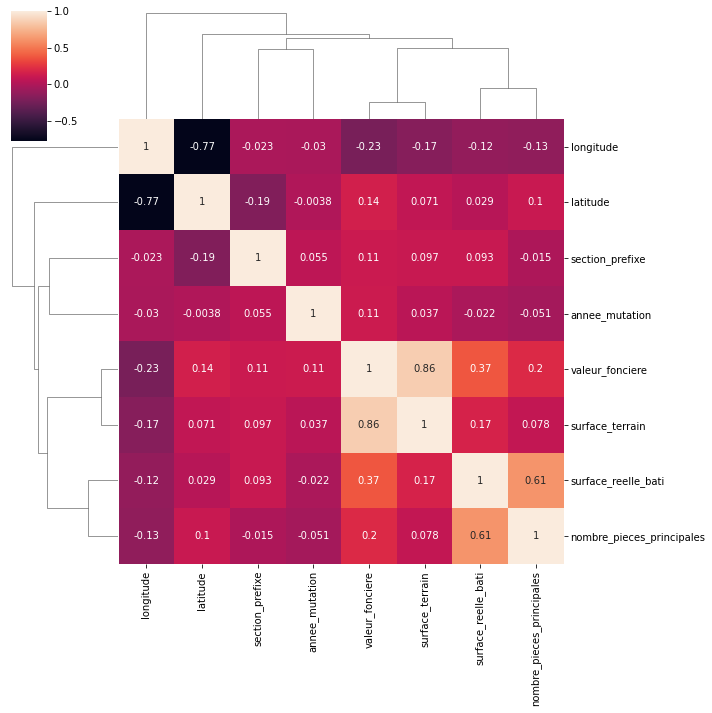

In [491]:
plt.figure(figsize=(10,8))
sns.clustermap(df_mai.corr(), annot=True)


<AxesSubplot:>

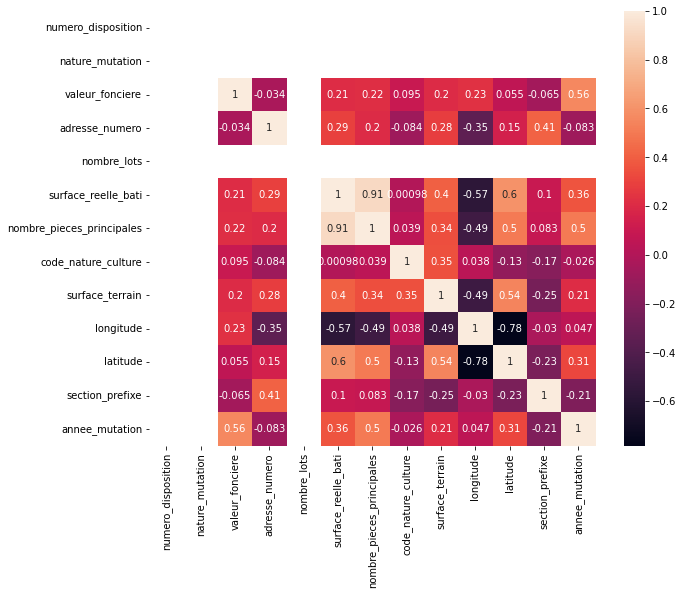

In [492]:
plt.figure(figsize=(10,8))
sns.heatmap(df_app.corr(), annot=True)

In [493]:
#Suppression des colonnes ayant une très faible correlation
df_app = df_app.drop(columns=['numero_disposition','nature_mutation','nombre_lots','adresse_numero','code_nature_culture'], axis=1)

<Figure size 720x576 with 0 Axes>

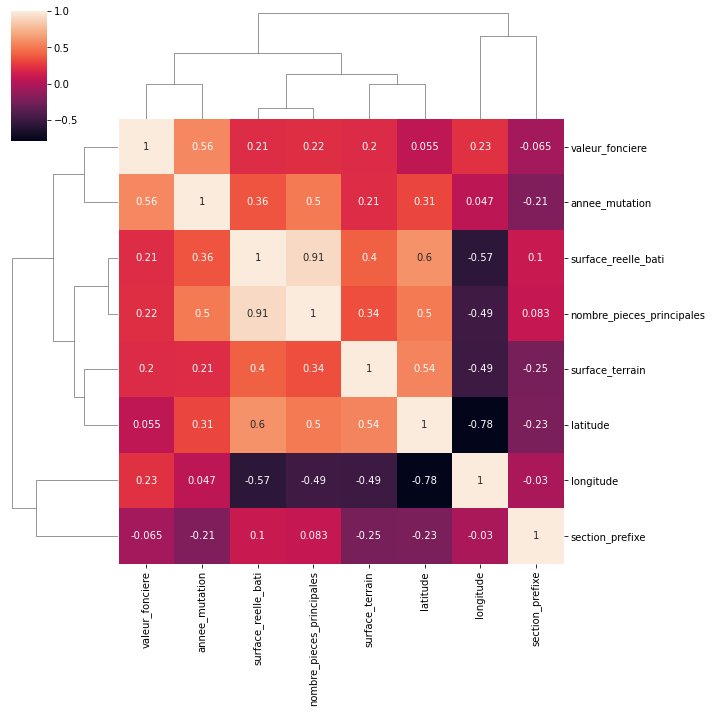

In [494]:
plt.figure(figsize=(10,8))
sns.clustermap(df_app.corr(), annot=True)

###  On remarque que maintenant on a une meilleure corrélation entre les features et notre target notamment  année_mutation qui est la plus corrélé avec la valeur fonciere, mais dans notre modèle je ne pense pas pouvoir utilisé ce feature, car l'utiliser devrai renseigner dans l'application tout les features qui seront utilisés dans notre modéle. Et je pense que demander l'année de mutation d'un appartement à un utilisateur pour estimer le prix d'une maison est insensé

# Conclusion : Après avoir séparé notre dataframe en 2 dataframe, l'un pour maison et l'autre pour appartement, on remarque une nette amélioration de la correlation se trouvant entre nos features et notre target. Maintenant il est temps d'implémenter nos modèles

# Implémentation des modéles

## Modéle pour les Maisons

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline  import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df_mai.drop(columns=['valeur_fonciere','longitude','latitude','annee_mutation'], axis=1) # On enleve les colonnes jugès pas important pour le calcul
y = df_mai['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Crée un transformer polynomiale
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transformer les données d'entrainement et de test
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg_mai = LinearRegression()
reg_mai.fit(X_train_poly,y_train)


LinearRegression()

In [496]:
#Stocker le résultat de nos prédictions
predictions = reg_mai.predict(X_test_poly)

In [497]:
#Calcul du score de notre model
reg_mai.score(X_test_poly, y_test)

0.751658358873631

Text(0.5, 1.0, 'Polynomial Regression Results')

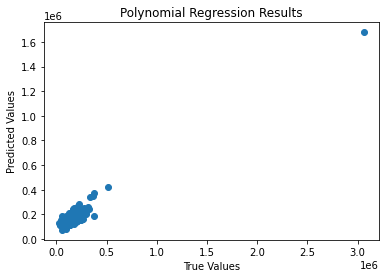

In [498]:
#Affichage pour visualiser la valeur réelle et celle calculé par notre modèle
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Results')


## Extraire les coefficients ainsi que intercept_, afin de pouvoir extraire l'équation de notre polynome

In [499]:
print(reg_mai.coef_)

[ 0.00000000e+00  1.50168101e+03  1.82025034e+04  1.06263368e+02
 -2.21840948e+02 -1.23017240e+02  4.66231874e-01  7.97807793e+00
 -2.32467828e+01 -9.86832447e+01  2.80505641e-01]


In [500]:
print(reg_mai.intercept_)

-14607.256792391738


## Voici donc la fonction de Maison qu'on doit implémenter dans notre application

In [501]:
def calcul_equation_maison(x1, x2, x3, x4):
    #x1 : surface_reelle_bati
    #x2 : nombre_pieces_principales
    #x3 : surface_terrain
    #x4 : section_prefixe (parcelle)
    
    coef = [0.00000000e+00 , 1.50168101e+03,  1.82025034e+04,  1.06263368e+02,
         -2.21840948e+02, -1.23017240e+02,  4.66231874e-01,  7.97807793e+00,
         -2.32467828e+01, -9.86832447e+01,  2.80505641e-01]
    intercept = -14607.256792391738
    
    equation = intercept + coef[1]*x1 + coef[2]*x2 + coef[3]*x3 + coef[4]*x4 + coef[5]*x1*x2 + coef[6]*x1*x3+ coef[7]*x1*x4 + coef[8]*x2*x3  + coef[9]*x2*x4+ coef[10]*x3*x4
   
    return equation


## Modéle pour les Appartement

In [502]:
X = df_app.drop(columns=['valeur_fonciere','longitude','latitude','annee_mutation'], axis=1)
y = df_app['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create a polynomial transformer
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg_app = LinearRegression()
reg_app.fit(X_train_poly,y_train)

LinearRegression()

In [503]:
predictions = reg_app.predict(X_test_poly)

Text(0.5, 1.0, 'Polynomial Regression Results')

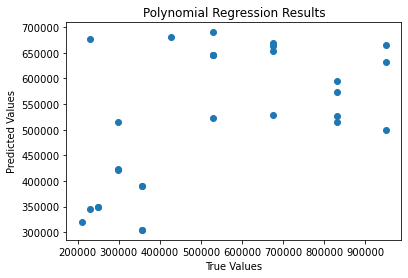

In [504]:
#Affichage pour visualiser la valeur réelle et celle calculé par notre modèle
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Results')

In [505]:
reg_app.score(X_test_poly, y_test)

0.3059881521838642

## Extraire les coefficients ainsi que intercept_, afin de pouvoir extraire l'équation de notre polynome

In [506]:
print(reg_app.coef_)
print(reg_app.intercept_)

[ 0.00000000e+00  8.26970326e+03  3.21642464e+05  2.54519530e+02
  1.73528223e+04 -3.09132103e+03  1.97105670e+00 -3.83197257e+02
 -1.25830078e+02 -3.34302865e+02  5.69821496e+00]
-234383.09085176938


## Voici donc la fonction de Appartement qu'on doit implémenter dans notre application

In [507]:
def calcul_equation_app(x1, x2, x3, x4):
    #x1 : surface_reelle_bati
    #x2 : nombre_pieces_principales
    #x3 : surface_terrain
    #x4 : section_prefixe (parcelle)
    
    coef = [  0.00000000e+00,  8.26970326e+03, 3.21642464e+05,  2.54519530e+02,
              1.73528223e+04, -3.09132103e+03 , 1.97105670e+00, -3.83197257e+02,
             -1.25830078e+02, -3.34302865e+02 , 5.69821496e+00]
    intercept = -234383.09085176938
    
    equation = intercept + coef[1]*x1 + coef[2]*x2 + coef[3]*x3 + coef[4]*x4 + coef[5]*x1*x2 + coef[6]*x1*x3+ coef[7]*x1*x4 + coef[8]*x2*x3 + coef[9]*x2*x4+ coef[10]*x3*x4
    
    return equation

# Conclusion Générale

###         Notre modèle pour maison a un score assez bon, il fait de bonne prédictions sur le prix des Maison, tandis que dans notre modèle pour Appartement on obtient un score assez faible et cela est du au données qu'on a. On a remarqué avant que la valeur fonciere avait une corrélation assez elevé avec année de mutation (0.5), mais on ne peut pas demander à l'utilisateur l'année de mutation d'une maison car c'est une information qui lui importe peu. Certe avec cette information on obtient des scores pour le modèle plus elevé(>0.7), Mais j'ai pris la décision de ne pas implémenter ce feature dans mon modèle